In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 
df = pd.read_csv(r"C:\Users\hs111\Documents\CPSC-4800\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#to check if there is any missing data.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 0, 'Pclass')

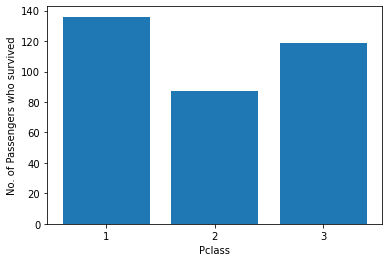

In [51]:
#plotting the no. of passengers who survived against the ticket class
Pclass_bar = ['1','2','3']
Survived_Pclass = []
Survived_Pclass.append(df[(df.Pclass == 1) & (df.Survived == 1)].shape[0])
Survived_Pclass.append(df[(df.Pclass == 2) & (df.Survived == 1)].shape[0])
Survived_Pclass.append(df[(df.Pclass == 3) & (df.Survived == 1)].shape[0])

plt.bar(Pclass_bar,Survived_Pclass)
plt.ylabel('No. of Passengers who survived')
plt.xlabel('Pclass')

Text(0.5, 0, 'Pclass')

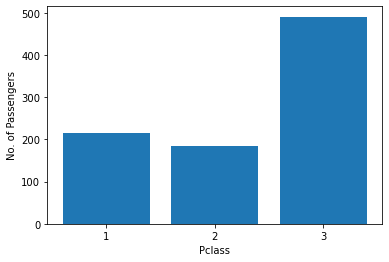

In [37]:
#plotting the total passengers in each ticket class
Pclass_bar = ['1','2','3']
Pclass_count = []
Pclass_count.append(df[(df.Pclass == 1)].shape[0])
Pclass_count.append(df[(df.Pclass == 2)].shape[0])
Pclass_count.append(df[(df.Pclass == 3)].shape[0])


plt.bar(Pclass_bar,Pclass_count)
plt.ylabel('No. of Passengers')
plt.xlabel('Pclass')

Text(0.5, 0, 'Pclass')

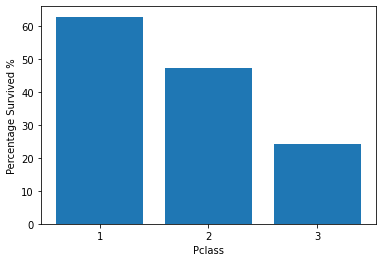

In [40]:
#plotting the percentage survival
percent_survived = []
percent_survived.append((Survived_Pclass[0]/Pclass_count[0])*100)
percent_survived.append((Survived_Pclass[1]/Pclass_count[1])*100)
percent_survived.append((Survived_Pclass[2]/Pclass_count[2])*100)

plt.bar(Pclass_bar,percent_survived)
plt.ylabel('Percentage Survived %')
plt.xlabel('Pclass')

In [48]:
#verfying the association using the chi-square test
contigency= pd.crosstab(df['Pclass'], df['Survived']) 
contigency

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [50]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

4.549251711298793e-23


In [77]:
contigency_2 = pd.crosstab(df['Sex'],df['Survived'])
contigency_2

Survived,0,1
Sex,,
female,81,233
male,468,109


In [76]:
c, p, dof, expected = chi2_contingency(contigency_2) 
# Print the p-value
print(p)

1.1973570627755645e-58


In [78]:
contigency_2.shape

(2, 2)

In [88]:
contigency_2.loc['female'].values.tolist()

[81, 233]

In [89]:
contigency_2.loc['male'].values.tolist()

[468, 109]

In [12]:
survived = []
gender = ["Female","Male"]
survived.append(contigency_2[1].values[0])
survived.append(contigency_2[1].values[1])
survived


[233, 109]

Text(0.5, 0, 'Sex')

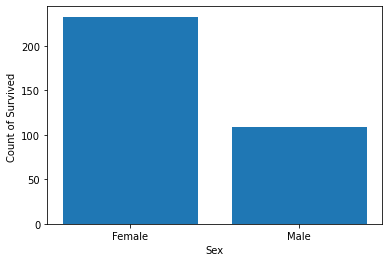

In [14]:
plt.bar(gender,survived)
plt.ylabel('Count of Survived ')
plt.xlabel('Sex')

In [16]:
Not_survived = []
gender = ["Female","Male"]
Not_survived.append(contigency_2[0].values[0])
Not_survived.append(contigency_2[0].values[1])
Not_survived
totalCount = []
totalCount.append(survived[0]+Not_survived[0])
totalCount.append(survived[1]+Not_survived[1])
totalCount

[314, 577]

Text(0.5, 0, 'Sex')

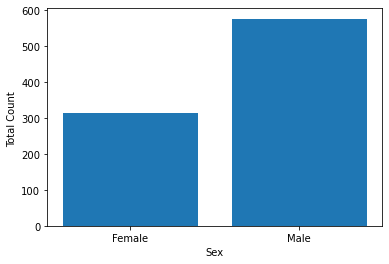

In [19]:
plt.bar(gender,totalCount)
plt.ylabel('Total Count ')
plt.xlabel('Sex')


Text(0.5, 0, 'Sex')

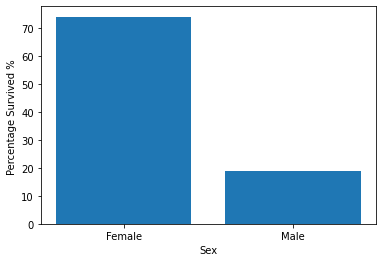

In [22]:

percent_survived = []
percent_survived.append((survived[0]/totalCount[0])*100)
percent_survived.append((survived[1]/totalCount[1])*100)
plt.bar(gender,percent_survived)
plt.ylabel('Percentage Survived % ')
plt.xlabel('Sex')


In [44]:
countchildren = 0
countyoung = 0
countadults = 0
countseniors = 0
for x in df['Age']:
    if x <= 14:
        countchildren+=1
       
    elif x <=24:
        countyoung+=1   
        
    elif x <= 64:
        countadults+=1     
#used x>0 for seniors as the cases with nan values have to be ignored
    elif x > 0:
        countseniors+=1

        
print(countchildren,countyoung,countadults,countseniors)
    

77 200 426 11


Text(0.5, 0, 'Age Categories <=14 <=24 <=64 >64 ')

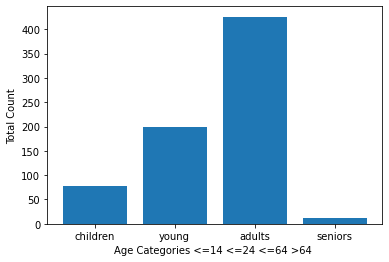

In [73]:
agecategories = ["children","young","adults","seniors"]
agecount = [countchildren,countyoung,countadults,countseniors]

plt.bar(agecategories,agecount)
plt.ylabel('Total Count')
plt.xlabel('Age Categories <=14 <=24 <=64 >64 ')


In [61]:
for index, row in df.iterrows():
#     df.at[index, 'new_column'] = new_value
    if df.at[index,'Age']  <= 14 :
        df.at[index,'AgeCategory'] = 'children'
        
    elif df.at[index,'Age'] <= 24 :
        df.at[index,'AgeCategory'] = 'young'
    
    elif df.at[index,'Age'] <= 64 :
        df.at[index,'AgeCategory'] = 'adults'
        
    elif df.at[index,'Age'] >0:
        df.at[index,'AgeCategory'] = 'seniors'

        

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  ageC         891 non-null    int64  
 13  AgeCategory  714 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [62]:
#calculating the count of people who survived
Survived_age = []
Survived_age.append(df[(df.AgeCategory == 'children') & (df.Survived == 1)].shape[0])
Survived_age.append(df[(df.AgeCategory == 'young') & (df.Survived == 1)].shape[0])
Survived_age.append(df[(df.AgeCategory == 'adults') & (df.Survived == 1)].shape[0])
Survived_age.append(df[(df.AgeCategory == 'seniors') & (df.Survived == 1)].shape[0])

Text(0.5, 0, 'Age Categories <=14 <=24 <=64 >64 ')

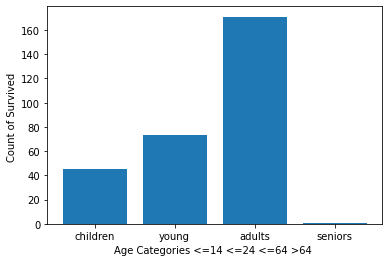

In [72]:
plt.bar(agecategories,Survived_age)
plt.ylabel('Count of Survived ')
plt.xlabel('Age Categories <=14 <=24 <=64 >64 ')

In [64]:
#calculating survival percentage for each age group
percent_survived_age = []
percent_survived_age.append((Survived_age[0]/agecount[0])*100)
percent_survived_age.append((Survived_age[1]/agecount[1])*100)
percent_survived_age.append((Survived_age[2]/agecount[2])*100)
percent_survived_age.append((Survived_age[3]/agecount[3])*100)

Text(0.5, 0, 'Age Categories <=14 <=24 <=64 >64 ')

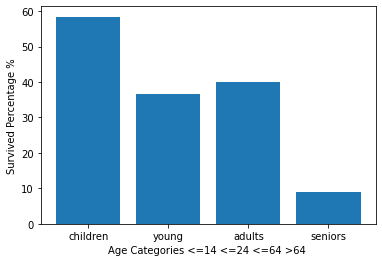

In [74]:
plt.bar(agecategories,percent_survived_age)
plt.ylabel('Survived Percentage %')
plt.xlabel('Age Categories <=14 <=24 <=64 >64 ')

In [66]:
#verifying this with a chi-square wheather there is a dependency or not
contigency_3 = pd.crosstab(df['AgeCategory'],df['Survived'])
contigency_3

Survived,0,1
AgeCategory,,
adults,255,171
children,32,45
seniors,10,1
young,127,73


In [75]:
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contigency_3) 
# Print the p-value
print(p)

0.0010709216002096906
